In [28]:
import matplotlib.pyplot as plt
from skimage import io

from scipy.signal import convolve
import numpy as np

import urllib.request

from PIL import Image

In [54]:
def show(img, kernel, resultado, titulo):
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    plot = [img, kernel, resultado]
    titulo = ['Imagem', titulo, 'Mapa de ativação']
    
    for k, ax in enumerate(axs):
        ax.imshow(plot[k], cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(titulo[k])
        
    for i, line in enumerate(kernel):
        for j, col in enumerate(line):
            axs[1].text(j, i, '{:.2f}'.format(col), fontsize=12, color='red', va='center', ha='center')

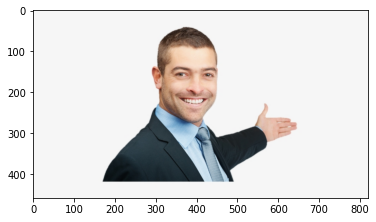

In [55]:
img = io.imread('person.png')
plt.imshow(img)

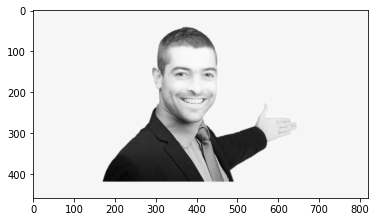

In [56]:
img = img[:, :, 0]
plt.imshow(img, cmap='gray')

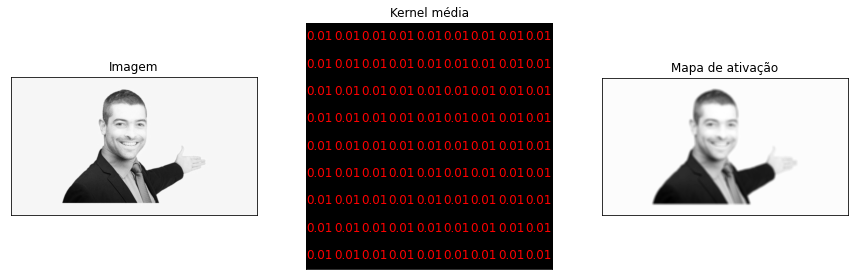

In [58]:
kernel_media = np.zeros((9, 9))
kernel_media[:] = 1.0/ (9**2)

resultado = convolve(img, kernel_media, mode='valid')
show(img, kernel_media, resultado, 'Kernel média')

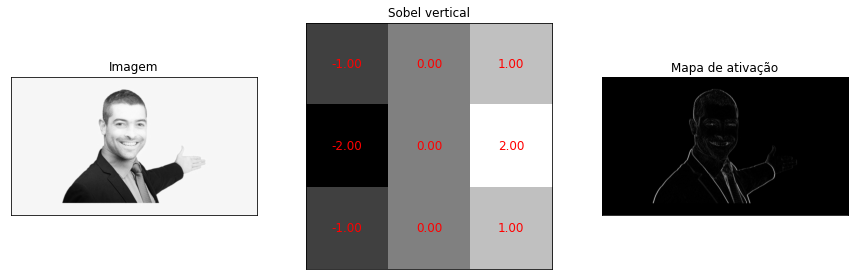

In [66]:
# Sobel vertical
sobel_v = np.zeros((3, 3))
sobel_v[:, 0] = -1
sobel_v[:, 2] = 1
sobel_v[1, [0, 2]] = [-2, 2]

resultado = convolve(img, sobel_v, mode='valid')
show(img, sobel_v, np.abs(resultado), 'Sobel vertical')

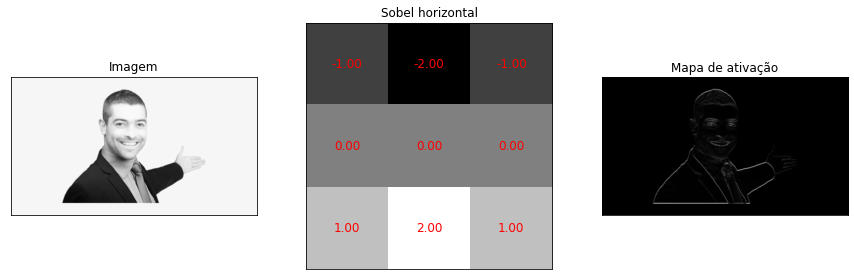

In [68]:
# Sobel horizontal
sobel_h = np.zeros((3, 3))
sobel_h[0, :] = -1
sobel_h[2, :] = 1
sobel_h[[0, 2], 1] = [-2, 2]

resultado = convolve(img, sobel_h, mode='valid')
show(img, sobel_h, np.abs(resultado), 'Sobel horizontal')

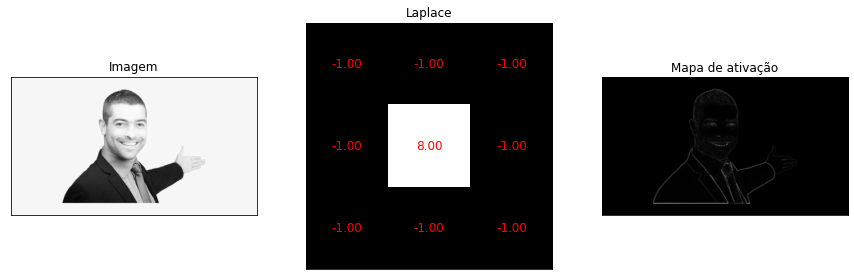

In [71]:
# Laplace
laplace = np.ones((3, 3)) * -1
laplace[1, 1] = 8

resultado = convolve(img, laplace, mode='valid')
show(img, laplace, np.abs(resultado), 'Laplace')